# Convective clouds and brightness temperatures TP

This notebook provides a prestudy, in order to get a better idea of brightness temperature variations over the Tibetan Plateau, since brightness temperatures are a common proxy for the identification and tracking of convective systems. 

In [1]:
from netCDF4 import Dataset 
import numpy as np
import matplotlib.pyplot as plt 
import xarray
import cartopy 
import cartopy.crs as ccrs
import matplotlib.colors as colors


tbbdir = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/'
mcsdir = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/'

In [15]:
# read in mask 
#file = mcsdir + 'tbb245/Mask_Segmentation_precip200002.nc'
#dataset = Dataset(file)
#mask = dataset['segmentation_mask'] 

# read in winter TBB 
file = tbbdir+ 'merg_DJF_mean.nc4'
dataset = Dataset(file)
tbb_winter = dataset['Tb'][0,:,:]
lat= dataset['lat']
lon= dataset['lon']

In [6]:
## Import elevation file for 3000 m boundary 

dem = '/media/juli/Data/projects/data/elevation/elevation_600x350.nc'
elevations = xarray.open_dataarray(dem)

lon = np.array(elevations['lon'])
lat = np.array(elevations['lat'])



In [5]:
## Import elevation file for 3000 m boundary , smaller domain 

dem = '/media/juli/Data/projects/master_thesis/Master_thesis/data/DEM_TP/dem_GPM_format.nc'
ds = Dataset(dem)
elevation = np.array(ds['__xarray_dataarray_variable__'])
f= '/media/juli/Data/projects/data/satellite_data/gpm_v06/monthly_means/gpm_mean_201506.nc4'
gpm= Dataset(f)
lo = np.array(gpm['lon'])
la = np.array(gpm['lat'])


In [11]:

import xarray
gpm = xarray.open_dataarray(f)
gpm.lat.values

array([26.95, 27.05, 27.15, 27.25, 27.35, 27.45, 27.55, 27.65, 27.75,
       27.85, 27.95, 28.05, 28.15, 28.25, 28.35, 28.45, 28.55, 28.65,
       28.75, 28.85, 28.95, 29.05, 29.15, 29.25, 29.35, 29.45, 29.55,
       29.65, 29.75, 29.85, 29.95, 30.05, 30.15, 30.25, 30.35, 30.45,
       30.55, 30.65, 30.75, 30.85, 30.95, 31.05, 31.15, 31.25, 31.35,
       31.45, 31.55, 31.65, 31.75, 31.85, 31.95, 32.05, 32.15, 32.25,
       32.35, 32.45, 32.55, 32.65, 32.75, 32.85, 32.95, 33.05, 33.15,
       33.25, 33.35, 33.45, 33.55, 33.65, 33.75, 33.85, 33.95, 34.05,
       34.15, 34.25, 34.35, 34.45, 34.55, 34.65, 34.75, 34.85, 34.95,
       35.05, 35.15, 35.25, 35.35, 35.45, 35.55, 35.65, 35.75, 35.85,
       35.95, 36.05, 36.15, 36.25, 36.35, 36.45, 36.55, 36.65, 36.75,
       36.85, 36.95, 37.05, 37.15, 37.25, 37.35, 37.45, 37.55, 37.65,
       37.75, 37.85, 37.95, 38.05, 38.15, 38.25, 38.35, 38.45, 38.55,
       38.65, 38.75, 38.85, 38.95, 39.05, 39.15, 39.25, 39.35, 39.45,
       39.55, 39.65,

In [5]:
# read in half hourly TBB 
import xarray 

file = tbbdir+ '2018/merg_201807.nc4'
dataset = xarray.open_dataarray(file)
lat= dataset.lat.values
lon= dataset.lon.values
time= dataset.time.values
mcs = dataset.values 


In [20]:
# precip data 

file = '/media/juli/Elements/gpm_v06/2018/gpm_imerg_201807_monthly.nc4'
dataset = xarray.open_dataarray(file)
precip_lat= dataset.lat.values
precip_lon= dataset.lon.values
precip_time= dataset.time.values
precip = dataset.values 

## Example single timestep 

! insert elevation background to show that 245 K corresponds to higher elevations 

In [9]:
elevations.shape

(600, 350)

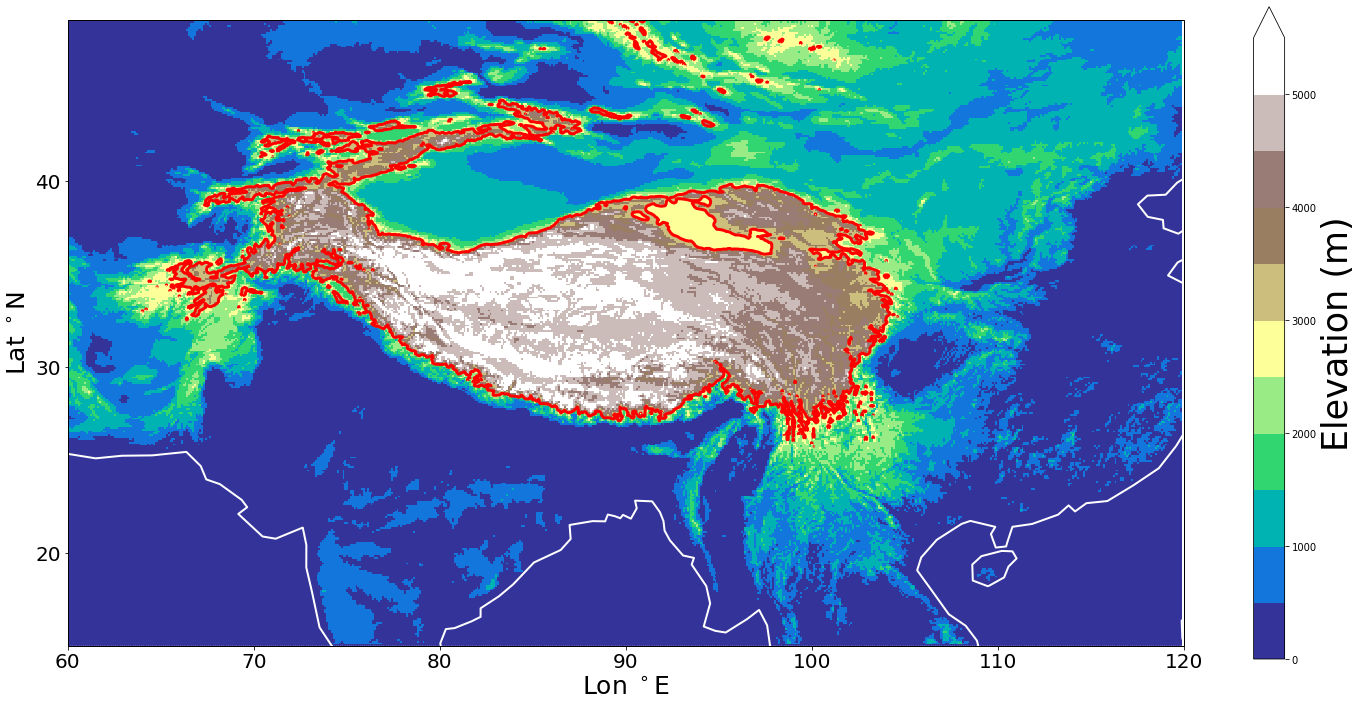

In [39]:
import cartopy 
import cartopy.crs as ccrs
import matplotlib.colors as colors

plt.figure(figsize=(25,12))


ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([np.nanmin(lon),np.nanmax(lon),15,45])


# 3000 m boundary 
plt.contour(lon,lat, elevations.T, [3000], cmap = 'autumn', linewidths= 3.0)

# define the bins and normalize
cmap=plt.cm.viridis
norm = colors.BoundaryNorm(np.array([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000, 5500]), cmap.N)
m = plt.pcolormesh(lon, lat, elevations.T, transform= ccrs.PlateCarree(), cmap= 'terrain', norm=norm )


xlabels=[60,70,80,90,100,110,120]
ylabels= [20,30,40]
plt.xticks(xlabels, xlabels, fontsize=20)
plt.yticks(ylabels,ylabels, fontsize=20)
plt.xlabel('Lon $^\circ$E',  fontsize=25)
plt.ylabel('Lat $^\circ$N',  fontsize=25)
ax.coastlines(color='white', linewidth= 2.0)


cbar= plt.colorbar(m, extend = 'max')
cbar.set_label('Elevation (m)', fontsize = 35)



plt.savefig('plots/elevations.png')

**When following conventional tracking methods (e.g. 245K for minimum of 100 contiguous pixels as done for the ISCCP CTD), parts of the surface could be identified as a cloud feature (especially during night in winter and at higher elevations during winter)!**


# Example for timeseries to create gifs: precip in clouds

In [21]:
timeseries= np.arange(0,1000)

0


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289


<Figure size 432x288 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

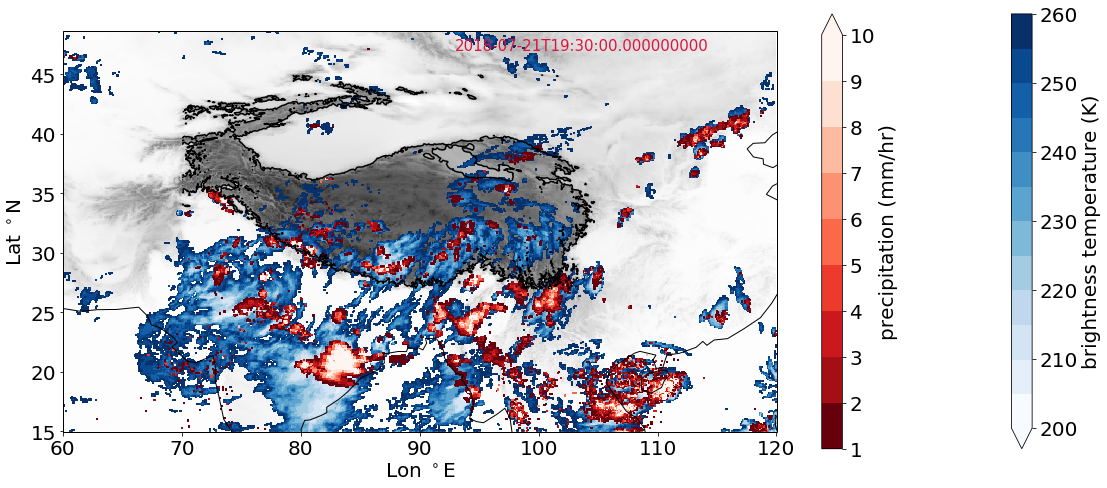

In [22]:

for t in timeseries:
    print(t)
    plt.clf()

    mcs_example=mcs[t,:,:]
    precip_example=precip[t,:,:]

    plt.figure(figsize=(20,8))

    ax1 = plt.axes(projection=ccrs.PlateCarree())             
    ax1.set_extent([np.nanmin(lon),np.nanmax(lon),np.nanmin(lat),45])

    # 3000 m boundary 
    ax1.contour(lo,la, elevation, [3000], cmap = 'Greys_r')
    ax1.pcolormesh(elevations.lon.values,elevations.lat.values, elevations.values.T,  cmap = 'Greys')

    # define the bins and normalize
    cmap=plt.cm.viridis
    norm = colors.BoundaryNorm(np.arange(200,265,5), cmap.N)

    z = np.ma.masked_array(mcs_example, mcs_example >260)

    m= ax1.pcolormesh(lon, lat, z, transform= ccrs.PlateCarree(), cmap= 'Blues', norm=norm, vmin = 200, vmax = 260 )

    norm = colors.BoundaryNorm(np.arange(1,11,1), cmap.N)
    mask = np.ma.masked_array(precip_example, precip_example < 1.0)
    p = ax1.pcolormesh(precip_lon, precip_lat, mask.T, transform= ccrs.PlateCarree(), cmap= 'Reds_r',norm=norm, vmin = 1.0 , vmax = 10.0)


    xlabels=[60,70,80,90,100,110,120]
    ylabels= [15, 20,25, 30,35, 40, 45]
    ax1.set_xticks(xlabels)
    ax1.set_xticklabels(xlabels, fontsize= 20) 
    ax1.set_yticklabels(ylabels, fontsize= 20) 
    ax1.set_yticks(ylabels)
    ax1.set_xlabel('Lon $^\circ$E', fontsize= 20)
    ax1.set_ylabel('Lat $^\circ$N', fontsize= 20)
    ax1.coastlines(color = 'k')

    cbar= plt.colorbar(m,extend = 'min')
    cmap.set_under(alpha= 0)
    cbar.set_label('brightness temperature (K)', fontsize = 20)
    cbar.ax.tick_params(labelsize=20) 

    cbar2= plt.colorbar(p,extend = 'max')
    cbar2.set_label('precipitation (mm/hr)', fontsize = 20)
    cbar2.ax.tick_params(labelsize=20) 

    timestr = time[t]

    ax1.text(93, 47, timestr, fontsize = 15, color = 'crimson')


    plt.tight_layout()

    plt.savefig('prestudy/evolution/precip_clouds_201807_'+ str(t) + '.png')
    #plt.show()


In [ ]:
for t in timeseries:
    print(t)
    plt.clf()

    mcs_example=mcs[t,:,:]
    precip_example=precip[t,:,:]

    plt.figure(figsize=(30,25))

    ax1 = plt.axes(projection=ccrs.PlateCarree())             
    ax1.set_extent([np.nanmin(lon),np.nanmax(lon),np.min(lat),45])

    # 3000 m boundary 
    ax1.contour(lo,la, elevation, [3000], cmap = 'Greys_r')
    ax1.pcolormesh(elevations.lon.values,elevations.lat.values, elevations.values.T,  cmap = 'Greys')

    # define the bins and normalize
    cmap=plt.cm.viridis
    norm = colors.BoundaryNorm(np.arange(200,265,5), cmap.N)

    z = np.ma.masked_array(mcs_example, mcs_example >260)

    m = ax1.pcolormesh(lon, lat, z, transform= ccrs.PlateCarree(), cmap= 'plasma_r', norm=norm, vmin = 200, vmax = 260 )
  
    p = ax1.pcolormesh(precip_lon, precip_lat, precip_example.T, transform= ccrs.PlateCarree(), cmap= 'Greys',norm=norm, vmin = 1 , vmax = 5)

    
    xlabels=[60,70,80,90,100,110,120]
    ylabels= [20,30,40]
    ax1.set_xticks(xlabels)
    ax1.set_xticklabels(xlabels, fontsize= 20) 
    ax1.set_yticklabels(ylabels, fontsize= 20) 
    ax1.set_yticks(ylabels,ylabels)
    ax1.set_xlabel('Lon $^\circ$E', fontsize= 25)
    ax1.set_ylabel('Lat $^\circ$N', fontsize= 25)
    ax1.coastlines(color = 'k')

    cbar= plt.colorbar(m, extend = 'min')
    cmap.set_under(alpha= 0)
    cbar.set_label('brightness temperature (K)', fontsize = 25)
    cbar.ax.tick_params(labelsize=20) 
    timestr = time[t]

    ax1.text(95, 47, timestr, fontsize = 25, color = 'k')
  
    plt.savefig('prestudy/evolution/precip_in_cloud_201307_'+ str(t) + '.png')
    plt.show()


## Distribution of TBB above 3000m for summer and winter 



**precip from precip tracking (10 pixel > 5mm/hr, in persistent precip for > 3hr)**

- loop through masks of tracked precip features 
- elevation file for GPM format: set elevation < 3000 to 0 
- open merge file for same timesteps
- select pixels via mask 
- save values to array and .txt file 

## Surface temperatures, 16 years 

In [35]:
# get files for specific months (only summer or only winter)
import glob
brightness_temps= glob.glob(tbbdir + '????/merg_????0[1-2].nc4')


for i in glob.glob(tbbdir + '????/merg_????12.nc4'):
    brightness_temps.append(i)

len(brightness_temps)

48

In [36]:
# get data from file 

counts= np.zeros((25,))
values = np.array(())

for file in brightness_temps:
    surface_temps = np.array(())
    # read in brightness temperature data 
    tbb= xarray.open_dataarray(file)
    # reshape TBB 
    TBB= tbb[:,1::, 1::].T
    
    filename= file[65:71]
    print(filename)
    
    for t in np.arange(0, np.shape(tbb)[2]):
        Tb = TBB[:,:,t]
        # mask as coordinates 
        mask = elevations.where(elevations > 3000)
        mask.coords['mask'] = (('lon', 'lat'), mask)

        # extract tbb > 3000 m 
        Tb = Tb.where(mask.coords['mask'].values > 1)
        arr= Tb.values.flatten()
        values = arr[~np.isnan(arr)]

        # calculate counts for bin edges to get histogram for each file  
        bins = np.arange(190,320,5)
        hist, bin_edges = np.histogram(values, bins = bins )
        counts += hist 
        
    print(np.nansum(counts), np.shape(counts))
    tbb.close()

np.savetxt('brightness_temps_surface_cells_winter_histogram.txt', counts)
print('saved.')
  

200002


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


17387895.0 (25,)
200101


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


35128090.0 (25,)
200102


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


52695244.0 (25,)
200201


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


70377496.0 (25,)
200202


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


88029864.0 (25,)
200301


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


105857313.0 (25,)
200302


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


123626458.0 (25,)
200401


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


141263145.0 (25,)
200402


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


158879594.0 (25,)
200501


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


176563735.0 (25,)
200502


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


194124943.0 (25,)
200601


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


211923479.0 (25,)
200602


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


228221126.0 (25,)
200701


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


246048562.0 (25,)
200702


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


263875973.0 (25,)
200801


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


281703316.0 (25,)
200802


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


299530521.0 (25,)
200901


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


317357468.0 (25,)
200902


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


335184917.0 (25,)
201001


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


352925114.0 (25,)
201002


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


370723642.0 (25,)
201101


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


388545871.0 (25,)
201102


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


406329777.0 (25,)
201201


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


424157214.0 (25,)
201202


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


441916373.0 (25,)
201301


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


459743674.0 (25,)
201302


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


477472496.0 (25,)
201401


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


495299937.0 (25,)
201402


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


513026424.0 (25,)
201501


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


530853874.0 (25,)
201502


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


548576818.0 (25,)
201601


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


566404260.0 (25,)
201602


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


IndexError: index 10 is out of bounds for axis 0 with size 10

In [37]:
np.savetxt('brightness_temps_surface_cells_winter_histogram.txt', counts)
print('saved.')

saved.


In [28]:
import numpy as np
summer_counts = np.loadtxt('prestudy/brightness_temps_precip_summer_1mm.txt')
counts = np.loadtxt('prestudy/brightness_temps_precip_winter_1mm.txt')
bins = np.arange(190,320,5)

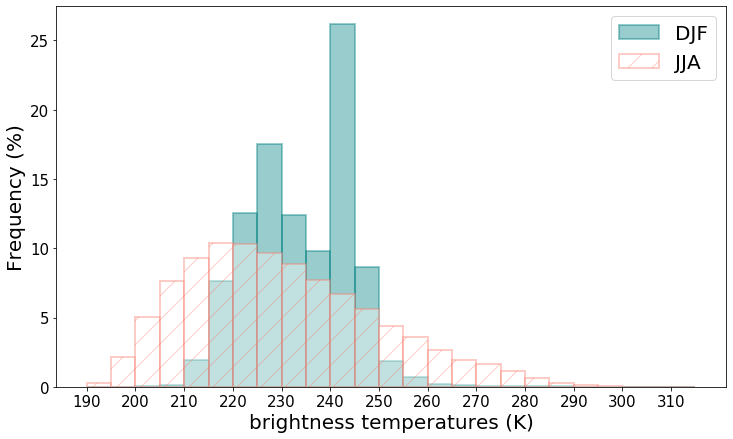

In [30]:
# plot of all brightness temperatures (including clear sky)
import matplotlib.pyplot as plt 
plt.figure(figsize = (12,7))


plt.bar(bins[:-1], counts/np.nansum(counts) * 100, width = 5, align= 'edge', edgecolor = 'teal', color = 'teal' , linewidth= 2.0, label= 'DJF', alpha = 0.4)

plt.bar(bins[:-1], summer_counts/np.nansum(summer_counts) * 100, width = 5, align= 'edge', edgecolor = 'salmon', color = 'white', alpha= 0.4, hatch= '/', linewidth= 2.0, label= 'JJA'
    )



plt.xticks(bins[::2], fontsize= 15)
plt.yticks(np.arange(0,30,5), fontsize= 15)
plt.legend(fontsize= 20)


plt.ylabel('Frequency (%)', fontsize = 20)
plt.xlabel('brightness temperatures (K)', fontsize= 20)
plt.savefig('TBB_tbb__precip1mm_summer_winter.png')
plt.show()


## GPM precip cells 2006 - 2016, 10 years of tracking

In [304]:
# import precip tracks 
import pandas as pd 


f = '/media/juli/Elements/gpm_v06/Save/Tracks_GPM_2006_2016_storms.h5'
tracks = pd.read_hdf(f, 'table')


# select only heavy impact cells 
storms= tracks[tracks['threshold_value'] >= 5] # 5mm/hr threshold feature in min 6 timesteps
times= storms.timestr.values
times = pd.DatetimeIndex(times)
storms.loc[storms.index, 'year'] = times.year
storms.loc[storms.index, 'month'] = times.month

/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
# precip data 2006 - 2016 
import glob

precip_files = glob.glob('/media/juli/Elements/gpm_v06/200[6-9]/gpm_imerg_??????_monthly.nc4')


for i in glob.glob('/media/juli/Elements/gpm_v06/201[0-5]/gpm_imerg_??????_monthly.nc4'):
    precip_files.append(i)
    
    
    
tbb_files = glob.glob(tbbdir+ '200[6-9]/merg_??????.nc4')

for i in glob.glob(tbbdir+'201[0-5]/merg_??????.nc4'):
    tbb_files.append(i)
    
    
precip_files.sort()
tbb_files.sort()
print(len(precip_files), len(tbb_files)) 


120 120


In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [6]:
# test shape coherence of precip and tbb files! 
count = 0 
for file in precip_files:
  
        # get data from file GPM
        data= Dataset(file)
        prec = np.array(data['precipitationCal']).T
        prec = prec[70:201,100:451, :]
        lats = np.array(data['lat'])[70:201]
        lons = np.array(data['lon'])[100:451]
        year = int(file[44:48])
        month = int(file[48:50])
        print('GPM:', year, month, np.shape(prec)[2])
       
        # open corresponding TBB file 
        file_tbb = tbb_files[count]
        data = Dataset(file_tbb)
        tbb= data['Tb']
        tbb= tbb[:,70:201,100:451]
        print('TBB', np.shape(tbb)[0], file_tbb)
        
        count += 1

KeyboardInterrupt: 

In [361]:
# index datarray by value and index 
selection = s.sel(lon = lons[10],  lat= lats[0])
timestep =  selection[dict(time= 1200 )].values

In [256]:
#prec = xarray.open_dataarray(file)
#tbb = xarray.open_dataarray(file_tbb)
#prec.lat.values
#tbb.lat.values

In [341]:
import datetime 

tbb.time.values

array(['2015-12-01T00:00:00.000000000', '2015-12-01T00:30:00.000000000',
       '2015-12-01T01:00:00.000000000', ...,
       '2015-12-31T22:30:00.000000000', '2015-12-31T23:00:00.000000000',
       '2015-12-31T23:30:00.000000000'], dtype='datetime64[ns]')

In [355]:
subselect[subselect.longitude== 70.22110209278485]
find_nearest(prec.lon.values,subselect.longitude.values[0])

70.25

In [335]:
import xarray 
frames = 0 
count = 0 

brightness_temps_JJA = np.array(())
brightness_temps_DJF = np.array(())

# loop through all precip files 
for file in precip_files:
  
        # get data from file GPM
        prec = xarray.open_dataarray(file)
        #prec = data.values
    
        year = int(file[44:48])
        month = int(file[48:50])
        print('read in file for ', year, month)
        
        if month in [1,2,6,7,8,12]:
        
            # open corresponding TBB file 
            file_tbb = tbb_files[count]
            tbb = xarray.open_dataarray(file_tbb)
            #tbb= data_tbb.values

            subselected = storms[storms['year'] == year]
            subselect = subselected[subselected['month'] == month]

            if subselect.shape[0] == 0 or np.shape(tbb)[0] != np.shape(prec)[0]:
                print('no features or TBB file does not contain same nr of timesteps', year, month)
                count += 1 
                frames += np.shape(prec)[0] 
                if year == 2006 and month == 7:
                    frames +=1 
                    print('shape updated')
                continue

            else:
            
                # convert framenumber to index     
                timeidx = subselect.frame.values - frames + 1 
                features = 0 

                # loop through subselected features
                for i,t in enumerate(timeidx):
                    # convert lats and lons to nearest lats and lons 
                    la= find_nearest(prec.lat.values,storms.latitude.values[i])
                    lo = find_nearest(prec.lon.values,storms.longitude.values[i])
                    la_dem= find_nearest(elevations.lat.values,storms.latitude.values[i])
                    lo_dem = find_nearest(elevations.lon.values,storms.longitude.values[i])
                    elev_loc = elevations.sel(lon = lo_dem, lat= la_dem).values
           
                    # apply elevation mask 
                    if elev_loc >= 3000: 
                        if month in [1,2,12]:
                            # get values from tbb 
                            selection = tbb.sel(lon = lo, lat= la)
                            value =  selection[dict(time= t)].values
                            brightness_temps_DJF= np.append(brightness_temps_DJF, value) 
                            features+= 1
                            if value > 270:
                                print('WARM', lo,la, t)
                        if month in [6,7,8]:
                            # get values from tbb 
                            selection = tbb.sel(lon = lo, lat= la)
                            value =  selection[dict(time= t)].values
                            brightness_temps_JJA= np.append(brightness_temps_JJA, value) 
                            features+= 1
                            if value > 270:
                                print('WARM', lo,la, t)
                   
                #if features == 0:
                    #print('all features for this month are outside of 3000m boundary')
                    
                if month== 7 and year == 2006:
                    frames +=1 
                    print('shape updated')

        count += 1 
        frames += np.shape(prec)[0] # keep track of framenumbers
        tbb.close()
        prec.close()
                    

            

read in file for  2006 1
read in file for  2006 2
WARM 76.65 32.35 187
WARM 76.65 32.35 188
WARM 76.65 32.35 190
WARM 76.65 32.35 191
WARM 76.65 32.25 736
WARM 76.75 32.15 737
WARM 76.85 32.15 737
WARM 78.15 31.45 740
WARM 78.15 31.35 740
WARM 78.15 31.45 741
WARM 78.25 31.45 744
WARM 78.25 31.45 745
WARM 77.55 31.85 1270
read in file for  2006 3
read in file for  2006 4
read in file for  2006 5
read in file for  2006 6
WARM 79.15 31.05 7
WARM 79.05 31.35 14
WARM 76.65 32.35 22
WARM 76.65 32.35 23
WARM 76.65 32.35 24
WARM 76.65 32.35 24
WARM 71.45 38.35 43
WARM 75.65 32.85 61
WARM 75.65 32.85 62
WARM 75.65 32.75 63
WARM 78.15 31.45 64
WARM 78.15 31.45 72
WARM 78.15 31.45 72
WARM 75.55 34.95 90
WARM 75.45 34.95 90
WARM 75.55 34.95 91
WARM 72.25 35.25 93
WARM 97.25 29.05 118
WARM 97.25 29.05 119
WARM 102.55 30.85 121
WARM 77.55 31.85 125
WARM 77.55 31.85 126
WARM 98.35 28.15 137
WARM 96.85 29.65 165
WARM 97.45 29.55 165
WARM 77.15 32.95 166
WARM 76.35 33.35 167
WARM 76.35 33.35 168
WARM 

WARM 101.65 27.95 1473
WARM 98.55 34.55 1474
WARM 101.65 27.95 1475
WARM 98.55 34.55 1475
WARM 101.65 27.95 1476
WARM 100.25 34.35 1486
WARM 101.35 28.45 1487
read in file for  2006 9
read in file for  2006 10
read in file for  2006 11
read in file for  2006 12
WARM 79.55 30.35 976
read in file for  2007 1
read in file for  2007 2
WARM 79.15 31.05 205
WARM 76.65 32.35 299
WARM 76.65 32.35 300
WARM 97.25 29.05 448
WARM 97.25 29.05 449
WARM 102.55 30.85 450
WARM 102.55 30.85 451
WARM 102.55 30.65 451
WARM 97.95 28.15 454
WARM 97.85 27.95 455
WARM 98.15 28.05 455
WARM 98.25 28.05 456
WARM 98.35 28.15 456
WARM 98.85 27.55 457
WARM 98.55 28.15 459
WARM 95.35 28.55 460
WARM 98.55 28.15 461
WARM 95.45 28.95 955
WARM 98.55 27.45 1176
WARM 98.55 27.95 1177
read in file for  2007 3
read in file for  2007 4
read in file for  2007 5
read in file for  2007 6
WARM 77.75 32.15 18
WARM 79.05 31.35 66
WARM 76.65 32.35 77
WARM 76.65 32.35 79
WARM 71.45 38.35 92
WARM 78.15 32.15 114
WARM 79.55 30.35 115


WARM 93.75 31.15 394
WARM 89.65 29.65 400
WARM 89.65 29.65 400
WARM 89.65 29.65 401
WARM 89.65 29.65 401
WARM 89.65 29.65 401
WARM 101.15 34.65 422
WARM 78.65 30.65 463
WARM 78.95 31.15 470
WARM 78.65 31.25 470
WARM 82.05 29.45 475
WARM 99.45 28.35 497
WARM 99.85 27.95 500
WARM 91.95 27.85 503
WARM 94.05 33.75 520
WARM 94.05 33.75 520
WARM 96.45 33.05 527
WARM 96.55 32.95 528
WARM 96.55 32.65 528
WARM 97.45 33.35 528
WARM 97.65 33.25 528
WARM 89.25 31.95 529
WARM 96.45 32.25 529
WARM 92.75 30.55 529
WARM 97.85 33.35 529
WARM 96.45 32.15 529
WARM 89.25 31.85 530
WARM 97.85 33.25 530
WARM 96.55 32.05 530
WARM 89.25 31.85 530
WARM 97.95 33.15 531
WARM 89.15 31.85 531
WARM 93.35 30.45 531
WARM 98.05 33.05 531
WARM 93.55 30.35 532
WARM 94.25 29.75 550
WARM 94.25 29.75 550
WARM 91.55 28.55 550
WARM 94.25 29.75 550
WARM 102.55 31.05 550
WARM 94.25 29.75 551
WARM 102.55 31.25 551
WARM 93.65 28.65 555
WARM 101.25 30.65 559
WARM 101.25 30.65 560
WARM 93.75 30.45 569
WARM 93.95 30.45 569
WARM 89.

WARM 97.95 28.15 50
WARM 97.85 27.95 51
WARM 98.15 28.05 51
WARM 98.25 28.05 51
WARM 98.35 28.15 52
WARM 98.55 28.15 57
WARM 98.55 28.15 58
WARM 95.35 28.55 58
WARM 98.55 28.15 59
WARM 96.85 29.65 73
WARM 97.45 29.55 73
WARM 95.65 29.15 79
WARM 95.75 29.35 80
WARM 95.75 29.35 81
WARM 95.85 29.25 82
WARM 75.65 33.65 98
WARM 86.15 28.15 112
WARM 86.25 28.05 112
WARM 86.35 28.05 113
WARM 95.25 28.85 167
WARM 98.55 27.45 190
WARM 98.55 27.95 191
WARM 98.25 28.05 191
WARM 98.25 28.05 192
WARM 98.25 28.15 192
WARM 78.75 31.05 203
WARM 97.35 28.35 213
WARM 97.65 28.45 213
WARM 97.95 28.65 214
WARM 95.35 28.95 215
WARM 95.95 29.35 215
WARM 70.25 35.35 246
WARM 70.85 35.85 248
WARM 71.05 35.95 248
WARM 77.75 31.85 260
WARM 70.55 37.85 317
WARM 76.55 32.75 325
WARM 76.75 32.85 326
WARM 76.75 32.85 326
WARM 76.95 32.85 327
WARM 96.85 27.65 336
WARM 86.85 27.55 354
WARM 87.15 27.55 355
WARM 86.95 27.55 355
WARM 86.85 27.55 356
WARM 86.85 27.55 356
WARM 96.65 28.55 361
WARM 94.45 29.05 382
WARM 76.

WARM 102.55 30.85 1160
read in file for  2008 2
WARM 79.05 31.35 882
WARM 79.55 30.35 1261
WARM 79.55 30.35 1263
read in file for  2008 3
read in file for  2008 4
read in file for  2008 5
read in file for  2008 6
WARM 76.65 32.35 36
WARM 71.45 38.35 42
WARM 71.85 38.25 42
WARM 79.55 30.35 49
WARM 79.55 30.35 49
WARM 78.15 31.35 67
WARM 78.25 31.45 69
WARM 78.25 31.45 69
WARM 78.25 31.45 69
WARM 78.55 31.25 70
WARM 78.55 31.15 70
WARM 78.55 31.25 71
WARM 78.65 31.35 71
WARM 78.15 31.45 71
WARM 78.15 31.45 71
WARM 77.25 32.35 72
WARM 77.45 32.35 73
WARM 77.75 32.25 73
WARM 72.05 36.55 73
WARM 77.55 31.95 128
WARM 77.55 31.85 130
WARM 77.55 31.85 130
WARM 95.35 28.55 141
WARM 77.15 32.95 154
WARM 77.25 32.85 162
WARM 76.25 33.55 162
WARM 76.35 33.35 173
WARM 76.35 33.35 174
WARM 76.35 33.35 175
WARM 76.55 33.55 176
WARM 95.65 29.15 183
WARM 95.75 29.35 184
WARM 95.75 29.35 185
WARM 95.85 29.25 187
WARM 70.35 42.15 188
WARM 76.35 33.65 210
WARM 76.35 33.55 211
WARM 76.55 33.55 211
WARM 76.

WARM 90.45 27.35 288
WARM 87.15 28.25 297
WARM 91.55 27.65 307
WARM 100.85 33.95 312
WARM 100.65 34.35 312
WARM 100.75 34.45 313
WARM 103.95 34.05 314
WARM 72.65 35.55 317
WARM 72.75 35.45 317
WARM 72.45 35.75 329
WARM 87.55 27.55 359
WARM 87.55 27.55 360
WARM 71.15 37.45 386
WARM 98.75 27.05 390
WARM 78.65 31.25 393
WARM 88.75 27.45 397
WARM 88.75 27.45 398
WARM 83.75 28.65 403
WARM 83.75 28.55 403
WARM 83.95 28.45 403
WARM 87.55 27.65 407
WARM 87.55 27.65 407
WARM 96.15 34.25 407
WARM 87.55 27.65 407
WARM 87.55 27.65 407
WARM 103.85 33.65 408
WARM 103.85 33.65 408
WARM 101.15 33.95 408
WARM 102.65 35.05 408
WARM 103.05 33.75 409
WARM 101.15 33.95 409
WARM 102.75 35.05 409
WARM 103.05 33.75 409
WARM 101.15 33.95 409
WARM 102.75 35.05 409
WARM 103.05 33.75 410
WARM 101.15 33.95 410
WARM 102.75 35.05 410
WARM 82.05 29.35 415
WARM 91.75 27.95 584
WARM 91.85 27.95 585
WARM 99.85 27.95 586
WARM 91.95 27.85 586
WARM 98.45 28.35 589
WARM 101.05 27.05 603
WARM 101.05 27.05 604
WARM 102.35 34.

WARM 77.15 32.95 98
WARM 77.25 32.85 98
WARM 76.25 33.55 98
WARM 76.35 33.35 98
WARM 76.35 33.35 99
WARM 76.35 33.35 99
WARM 76.55 33.55 99
WARM 77.75 32.55 100
WARM 95.65 29.15 100
WARM 95.75 29.35 100
WARM 95.75 29.35 101
WARM 95.85 29.25 101
WARM 70.35 42.15 102
WARM 76.35 33.55 111
WARM 76.55 33.55 111
WARM 76.55 33.45 112
WARM 75.65 33.65 120
WARM 77.55 31.65 135
WARM 77.75 31.85 135
WARM 77.95 31.95 136
WARM 77.25 32.75 155
WARM 77.35 32.65 157
WARM 77.25 32.55 158
WARM 77.35 32.45 159
WARM 77.35 32.55 159
WARM 95.25 28.85 160
WARM 98.55 27.45 165
WARM 98.55 27.95 165
WARM 98.25 28.05 165
WARM 98.25 28.05 165
WARM 98.25 28.15 166
WARM 95.35 28.95 173
WARM 95.45 28.95 173
WARM 70.25 35.35 197
WARM 70.85 35.85 200
WARM 71.05 35.95 200
WARM 70.55 37.85 253
WARM 80.85 30.45 254
WARM 76.55 32.75 255
WARM 76.75 32.85 255
WARM 76.75 32.85 255
WARM 76.95 32.85 255
WARM 91.65 27.75 256
WARM 96.65 28.55 268
WARM 94.65 30.55 268
WARM 95.15 30.65 268
WARM 95.15 30.65 268
WARM 89.65 27.95 269

WARM 77.45 32.35 182
WARM 72.25 35.25 185
WARM 97.25 29.05 209
WARM 97.25 29.05 214
WARM 102.55 30.85 227
WARM 77.55 31.95 229
WARM 102.55 30.65 230
WARM 77.55 31.85 233
WARM 77.55 31.85 233
WARM 97.95 28.15 239
WARM 97.85 27.95 246
WARM 98.15 28.05 247
WARM 98.25 28.05 249
WARM 98.35 28.15 257
WARM 98.85 27.55 259
WARM 98.55 28.15 264
WARM 98.55 28.15 264
WARM 95.35 28.55 265
WARM 97.45 29.55 285
WARM 95.65 29.15 290
WARM 95.75 29.35 299
WARM 95.75 29.35 300
WARM 95.85 29.25 307
WARM 75.65 33.65 367
WARM 77.55 31.65 404
WARM 86.15 28.15 422
WARM 86.25 28.05 425
WARM 85.85 27.95 577
WARM 85.85 27.95 579
WARM 95.25 28.85 620
WARM 95.45 28.95 621
WARM 98.55 27.45 656
WARM 98.55 27.95 659
WARM 98.25 28.05 659
WARM 98.25 28.05 660
WARM 98.25 28.15 660
WARM 78.75 31.05 660
WARM 97.35 28.35 718
WARM 97.65 28.45 719
WARM 97.95 28.65 720
WARM 95.35 28.95 721
WARM 95.45 28.95 722
WARM 95.95 29.35 723
WARM 70.25 35.35 811
WARM 70.85 35.85 814
WARM 76.55 32.75 909
WARM 76.75 32.85 909
WARM 76.75 

WARM 99.85 33.15 1264
WARM 99.75 33.15 1264
WARM 99.75 33.05 1265
WARM 99.75 33.05 1265
WARM 99.75 33.05 1265
WARM 99.75 33.05 1267
WARM 89.15 31.35 1267
WARM 96.35 34.45 1293
WARM 96.45 34.35 1294
WARM 98.65 33.55 1294
WARM 98.65 33.65 1295
WARM 98.75 33.65 1296
WARM 98.75 33.65 1297
WARM 98.75 33.65 1297
WARM 98.75 33.65 1297
WARM 97.55 28.25 1300
WARM 97.45 28.35 1300
WARM 97.75 27.95 1304
WARM 94.75 34.45 1307
WARM 94.75 34.45 1307
WARM 74.65 35.45 1312
WARM 74.65 35.45 1313
WARM 78.35 41.45 1318
WARM 78.05 41.25 1321
WARM 100.45 31.15 1328
WARM 75.95 34.05 1334
WARM 99.85 30.25 1335
WARM 98.35 35.25 1342
WARM 98.35 35.35 1342
WARM 102.25 34.45 1358
WARM 102.25 34.45 1360
WARM 101.75 33.85 1367
WARM 97.85 32.45 1401
WARM 94.25 32.25 1404
WARM 100.75 32.75 1415
WARM 102.55 32.75 1418
WARM 102.55 32.75 1418
WARM 102.45 32.75 1418
WARM 102.65 32.85 1418
WARM 103.55 32.65 1419
WARM 103.55 32.65 1420
WARM 104.35 32.85 1421
WARM 74.85 40.85 1445
WARM 74.75 40.75 1446
WARM 74.75 40.75 144

WARM 99.85 33.15 1120
WARM 82.85 28.45 1120
WARM 99.75 33.15 1120
WARM 82.85 28.55 1121
WARM 99.75 33.05 1121
WARM 94.45 29.15 1121
WARM 99.75 33.05 1122
WARM 99.85 28.15 1122
WARM 99.75 33.05 1123
WARM 82.95 28.55 1123
WARM 99.85 28.15 1124
WARM 99.75 33.05 1124
WARM 82.55 28.75 1125
WARM 99.85 28.05 1126
WARM 99.95 28.05 1128
WARM 98.75 29.25 1130
WARM 100.15 28.05 1130
WARM 100.15 28.05 1131
WARM 100.55 27.75 1133
WARM 93.85 28.95 1170
WARM 94.05 28.95 1172
WARM 94.05 28.85 1172
WARM 94.05 28.85 1173
WARM 94.05 28.75 1173
WARM 94.15 28.75 1174
WARM 94.15 28.65 1174
WARM 100.75 27.95 1175
WARM 100.65 27.95 1175
WARM 100.65 27.95 1175
WARM 99.15 28.85 1179
WARM 100.05 28.95 1180
WARM 99.05 28.85 1180
WARM 100.15 28.65 1180
WARM 98.85 28.85 1181
WARM 100.45 28.55 1181
WARM 98.95 28.85 1181
WARM 100.45 28.45 1182
WARM 98.95 28.85 1182
WARM 98.95 28.75 1183
WARM 98.95 28.65 1183
WARM 98.95 28.65 1184
WARM 98.95 28.65 1187
WARM 98.75 28.65 1188
WARM 95.85 29.95 1194
WARM 96.35 34.45 1197


WARM 96.85 29.65 126
WARM 97.45 29.55 126
WARM 77.15 32.95 126
WARM 77.25 32.85 126
WARM 76.25 33.55 126
WARM 76.35 33.35 126
WARM 76.35 33.35 126
WARM 76.35 33.35 127
WARM 76.55 33.55 127
WARM 77.75 32.55 127
WARM 95.65 29.15 127
WARM 70.35 42.15 128
WARM 76.35 33.65 132
WARM 76.35 33.55 132
WARM 76.55 33.55 132
WARM 76.55 33.45 132
WARM 77.55 32.75 137
WARM 77.55 32.75 137
WARM 75.65 33.65 137
WARM 77.55 31.65 148
WARM 77.75 31.85 148
WARM 77.95 31.95 148
WARM 86.15 28.15 149
WARM 95.25 28.85 172
WARM 95.45 28.95 173
WARM 78.75 31.05 177
WARM 95.35 28.95 185
WARM 95.45 28.95 185
WARM 95.95 29.35 185
WARM 70.25 35.35 215
WARM 71.05 35.95 216
WARM 70.55 37.85 252
WARM 91.65 27.75 256
WARM 96.85 27.65 259
WARM 86.85 27.55 266
WARM 87.15 27.55 267
WARM 86.95 27.55 267
WARM 86.85 27.55 267
WARM 86.85 27.55 267
WARM 89.05 28.35 276
WARM 89.65 27.95 276
WARM 89.85 27.85 277
WARM 90.25 27.75 278
WARM 80.85 30.25 294
WARM 75.55 34.05 315
WARM 76.15 34.15 316
WARM 76.25 34.25 316
WARM 76.05 33

WARM 100.65 30.95 1245
WARM 97.85 32.45 1246
WARM 97.85 32.45 1247
WARM 102.55 32.75 1247
WARM 102.55 32.75 1248
WARM 102.45 32.75 1248
WARM 102.65 32.85 1249
WARM 103.55 32.65 1252
WARM 103.55 32.65 1254
WARM 104.35 32.85 1254
WARM 91.45 28.95 1263
WARM 93.95 29.25 1263
WARM 91.45 28.95 1263
WARM 93.95 29.15 1264
WARM 74.85 40.85 1291
WARM 74.75 40.75 1291
WARM 74.75 40.75 1292
WARM 86.75 28.85 1294
WARM 85.85 28.95 1295
WARM 86.65 28.85 1295
WARM 85.85 28.95 1296
WARM 86.65 28.85 1297
WARM 91.65 27.65 1298
WARM 91.65 27.75 1300
WARM 99.45 27.05 1315
WARM 95.55 28.85 1326
WARM 98.15 37.55 1343
WARM 98.05 37.55 1344
WARM 98.05 37.55 1344
WARM 98.05 37.55 1345
WARM 98.05 37.55 1346
WARM 93.25 29.95 1347
WARM 93.15 29.95 1350
WARM 93.25 29.95 1350
WARM 85.75 29.35 1353
WARM 95.55 29.45 1360
WARM 95.85 29.35 1360
WARM 96.15 29.25 1361
WARM 96.35 29.15 1362
WARM 99.75 31.45 1369
WARM 103.15 30.95 1378
WARM 99.45 29.65 1380
WARM 99.15 29.65 1381
WARM 99.05 29.55 1382
WARM 99.05 29.55 1383
W

WARM 78.15 31.45 30
WARM 78.15 31.45 31
WARM 77.25 32.35 31
WARM 77.45 32.35 31
WARM 72.05 36.55 32
WARM 75.55 34.95 34
WARM 75.45 34.95 34
WARM 75.55 34.95 35
WARM 76.15 34.05 36
WARM 97.25 29.05 62
WARM 102.55 30.85 64
WARM 102.55 30.85 64
WARM 77.55 31.95 64
WARM 102.55 30.65 65
WARM 77.55 31.85 65
WARM 77.55 31.85 66
WARM 98.15 28.05 69
WARM 98.25 28.05 69
WARM 98.35 28.15 70
WARM 95.35 28.55 75
WARM 77.15 32.95 85
WARM 77.25 32.85 85
WARM 76.25 33.55 85
WARM 76.35 33.35 85
WARM 76.35 33.35 86
WARM 76.35 33.35 86
WARM 76.55 33.55 86
WARM 77.75 32.55 86
WARM 70.35 42.15 87
WARM 76.35 33.65 90
WARM 76.35 33.55 90
WARM 76.55 33.45 91
WARM 77.75 32.75 103
WARM 77.95 32.85 103
WARM 77.45 32.75 103
WARM 77.55 32.75 104
WARM 77.55 32.75 104
WARM 75.65 33.65 104
WARM 77.55 31.65 117
WARM 77.95 31.95 117
WARM 86.15 28.15 118
WARM 86.25 28.05 119
WARM 86.35 28.05 120
WARM 86.35 28.25 126
WARM 95.25 28.85 135
WARM 95.45 28.95 136
WARM 78.75 31.05 142
WARM 95.35 28.95 158
WARM 95.45 28.95 158


WARM 96.05 31.75 1157
WARM 96.05 31.75 1157
WARM 98.35 35.25 1163
WARM 98.35 35.35 1165
WARM 74.65 33.55 1166
WARM 75.35 34.65 1173
WARM 102.25 34.45 1188
WARM 100.15 33.85 1189
WARM 102.25 34.45 1190
WARM 102.25 34.35 1191
WARM 100.95 33.75 1199
WARM 101.75 33.85 1199
WARM 100.45 33.85 1201
WARM 101.05 33.95 1203
WARM 102.05 33.45 1221
WARM 101.55 33.25 1235
WARM 101.55 33.25 1236
WARM 101.45 33.25 1237
WARM 92.35 27.65 1239
WARM 96.85 28.15 1249
WARM 96.95 28.15 1250
WARM 100.65 30.95 1251
WARM 100.75 32.75 1251
WARM 100.55 30.95 1252
WARM 100.75 32.75 1252
WARM 100.65 30.95 1253
WARM 102.55 32.75 1255
WARM 102.55 32.75 1255
WARM 102.45 32.75 1255
WARM 102.65 32.85 1255
WARM 103.55 32.65 1256
WARM 103.55 32.65 1257
WARM 104.35 32.85 1257
WARM 91.45 28.95 1260
WARM 91.45 28.95 1260
WARM 88.95 29.15 1260
WARM 100.75 29.25 1261
WARM 100.85 29.35 1261
WARM 89.45 28.95 1262
WARM 99.95 28.95 1264
WARM 101.05 27.35 1264
WARM 93.75 28.95 1273
WARM 93.75 28.95 1273
WARM 93.65 28.75 1273
WARM 

WARM 102.85 33.85 1099
WARM 95.75 32.85 1099
WARM 96.45 31.95 1099
WARM 96.85 31.95 1100
WARM 96.85 31.95 1100
WARM 93.65 30.15 1101
WARM 96.95 32.05 1101
WARM 101.35 33.55 1101
WARM 101.45 33.55 1102
WARM 101.55 33.65 1102
WARM 86.75 27.55 1102
WARM 101.45 33.55 1102
WARM 86.65 27.65 1102
WARM 101.75 33.35 1103
WARM 89.05 27.35 1105
WARM 89.05 27.35 1106
WARM 102.45 30.45 1106
WARM 84.65 28.45 1107
WARM 102.35 30.45 1107
WARM 102.35 30.45 1108
WARM 94.65 34.15 1126
WARM 94.75 34.15 1127
WARM 96.35 34.35 1127
WARM 94.85 34.15 1128
WARM 96.35 34.35 1128
WARM 94.95 34.15 1128
WARM 90.55 31.75 1129
WARM 98.55 34.55 1129
WARM 101.45 33.35 1130
WARM 98.55 34.55 1130
WARM 101.45 33.35 1130
WARM 98.55 34.55 1131
WARM 101.45 33.35 1131
WARM 100.75 34.25 1132
WARM 101.45 33.35 1133
WARM 100.45 34.35 1135
WARM 101.45 33.35 1136
WARM 100.25 34.35 1137
WARM 100.65 33.25 1137
WARM 101.35 33.35 1137
WARM 100.65 33.35 1139
WARM 100.25 34.35 1139
WARM 100.95 33.25 1140
WARM 100.65 34.45 1141
WARM 101.

WARM 96.45 30.45 1079
WARM 96.35 30.55 1079
WARM 98.15 30.65 1081
WARM 83.25 29.05 1087
WARM 83.25 28.95 1087
WARM 82.85 28.65 1107
WARM 82.95 28.65 1108
WARM 93.75 31.15 1140
WARM 101.85 33.25 1164
WARM 101.85 33.25 1164
WARM 97.65 33.55 1168
WARM 100.95 34.65 1169
WARM 101.05 34.65 1169
WARM 101.15 34.65 1169
WARM 78.65 30.65 1221
WARM 84.05 28.65 1242
WARM 84.45 28.55 1245
WARM 84.85 28.55 1250
WARM 82.05 29.45 1251
WARM 81.25 29.75 1262
WARM 99.45 28.35 1283
WARM 91.75 27.95 1283
WARM 91.85 27.95 1284
WARM 92.05 27.85 1285
WARM 99.85 27.95 1285
WARM 91.95 27.85 1286
WARM 98.55 28.45 1287
WARM 98.45 28.35 1288
WARM 98.45 28.35 1289
WARM 101.05 27.05 1319
WARM 87.55 27.75 1323
WARM 87.55 27.75 1324
WARM 88.05 27.55 1325
WARM 88.15 27.55 1325
WARM 88.05 27.55 1325
WARM 88.75 27.65 1326
WARM 94.05 33.75 1334
WARM 102.35 34.15 1357
WARM 102.35 34.15 1359
WARM 89.25 31.95 1373
WARM 96.45 32.25 1374
WARM 97.85 33.35 1376
WARM 96.45 32.15 1377
WARM 89.25 31.85 1378
WARM 89.25 31.85 1381
WA

WARM 75.95 34.05 1123
WARM 96.05 31.75 1128
WARM 96.05 31.75 1128
WARM 98.35 35.25 1132
WARM 74.65 33.45 1132
WARM 98.35 35.35 1132
WARM 74.95 34.35 1134
WARM 75.45 34.55 1135
WARM 102.25 34.45 1138
WARM 100.15 33.85 1138
WARM 102.25 34.45 1139
WARM 102.25 34.35 1139
WARM 100.95 33.75 1141
WARM 101.75 33.85 1141
WARM 100.45 33.85 1142
WARM 101.05 33.95 1142
WARM 101.55 33.25 1147
WARM 101.45 33.25 1148
WARM 96.85 28.15 1168
WARM 96.95 28.15 1169
WARM 97.85 32.45 1170
WARM 100.65 30.95 1172
WARM 100.75 32.75 1172
WARM 97.85 32.45 1173
WARM 100.55 30.95 1174
WARM 100.75 32.75 1174
WARM 97.85 32.45 1175
WARM 100.65 30.95 1178
WARM 102.55 32.75 1181
WARM 102.55 32.75 1181
WARM 102.45 32.75 1181
WARM 102.65 32.85 1182
WARM 103.55 32.65 1183
WARM 103.55 32.65 1185
WARM 104.35 32.85 1186
WARM 100.75 29.25 1191
WARM 100.95 29.25 1191
WARM 100.85 29.35 1192
WARM 100.85 29.25 1193
WARM 99.95 28.95 1199
WARM 101.05 27.35 1200
WARM 100.25 28.85 1201
WARM 74.85 40.85 1226
WARM 74.75 40.75 1226
WARM

WARM 94.65 34.15 1050
WARM 96.35 34.35 1050
WARM 94.75 34.15 1050
WARM 96.35 34.35 1050
WARM 94.85 34.15 1051
WARM 96.35 34.35 1051
WARM 94.95 34.15 1051
WARM 101.45 33.35 1052
WARM 101.45 33.35 1053
WARM 101.45 33.35 1053
WARM 100.75 34.25 1054
WARM 101.45 33.35 1055
WARM 100.45 34.35 1056
WARM 101.45 33.35 1056
WARM 100.25 34.35 1057
WARM 101.35 33.35 1057
WARM 100.25 34.35 1058
WARM 100.95 33.25 1058
WARM 101.35 28.45 1059
WARM 100.65 34.45 1059
WARM 101.15 33.25 1060
WARM 100.75 34.45 1061
WARM 97.05 33.25 1061
WARM 101.15 34.35 1062
WARM 101.75 33.05 1065
WARM 101.65 34.25 1065
WARM 101.75 33.05 1067
WARM 101.65 34.25 1068
WARM 91.15 30.95 1070
WARM 91.75 30.95 1072
WARM 93.65 31.35 1078
WARM 99.15 32.55 1083
WARM 99.45 32.35 1084
WARM 98.25 32.55 1087
WARM 98.25 32.55 1087
WARM 101.15 31.45 1087
WARM 98.35 32.45 1088
WARM 101.15 31.45 1088
WARM 98.65 32.25 1089
WARM 101.15 31.45 1090
WARM 101.15 31.65 1090
WARM 101.55 31.45 1092
WARM 94.45 31.05 1093
WARM 94.75 31.05 1094
WARM 93

WARM 101.85 33.25 859
WARM 101.75 33.25 859
WARM 101.75 33.25 860
WARM 100.95 34.65 862
WARM 101.05 34.65 863
WARM 101.15 34.65 863
WARM 78.65 30.65 918
WARM 78.95 31.15 937
WARM 82.05 29.45 950
WARM 101.05 27.05 999
WARM 101.05 27.05 999
WARM 89.25 31.95 1037
WARM 89.25 31.85 1038
WARM 89.25 31.85 1040
WARM 89.15 31.85 1041
WARM 87.75 29.15 1077
WARM 100.95 27.05 1109
WARM 100.95 27.05 1109
WARM 103.95 35.75 1142
WARM 103.95 35.75 1142
WARM 89.95 32.45 1247
WARM 91.05 32.05 1249
WARM 91.15 32.05 1250
WARM 91.25 32.05 1251
WARM 90.25 33.85 1252
WARM 91.45 32.05 1252
WARM 90.35 33.85 1253
WARM 91.55 31.95 1253
WARM 89.45 33.65 1253
WARM 90.45 33.85 1254
WARM 90.75 30.95 1254
WARM 91.75 32.05 1255
WARM 89.65 33.65 1261
WARM 90.85 30.95 1263
WARM 91.85 32.05 1264
WARM 89.75 33.55 1265
WARM 91.95 32.05 1265
WARM 94.45 33.15 1267
WARM 90.85 31.05 1267
WARM 90.85 30.95 1267
WARM 102.25 30.85 1281
WARM 101.45 30.45 1281
WARM 102.15 30.55 1282
WARM 101.45 30.45 1282
WARM 102.05 30.55 1283
WARM

WARM 99.15 28.85 1053
WARM 100.05 28.95 1054
WARM 92.75 27.95 1054
WARM 99.05 28.85 1055
WARM 100.15 28.65 1056
WARM 98.85 28.85 1056
WARM 100.45 28.55 1056
WARM 98.95 28.85 1057
WARM 100.45 28.45 1057
WARM 98.95 28.85 1057
WARM 96.25 29.75 1058
WARM 98.95 28.75 1058
WARM 96.35 29.75 1058
WARM 98.95 28.65 1067
WARM 98.95 28.65 1070
WARM 96.55 29.55 1070
WARM 96.45 29.35 1071
WARM 98.95 28.65 1071
WARM 86.25 30.45 1072
WARM 96.65 29.05 1073
WARM 87.35 27.85 1073
WARM 96.55 28.85 1074
WARM 87.25 27.85 1074
WARM 87.25 27.85 1075
WARM 87.25 27.85 1076
WARM 87.35 27.85 1079
WARM 95.55 30.25 1079
WARM 87.35 27.85 1080
WARM 96.15 28.45 1088
WARM 84.45 28.55 1094
WARM 94.75 34.45 1113
WARM 90.55 28.65 1116
WARM 90.55 28.65 1116
WARM 90.55 28.65 1116
WARM 74.65 35.45 1118
WARM 74.65 35.45 1119
WARM 78.35 41.45 1122
WARM 93.35 28.65 1125
WARM 93.05 31.15 1128
WARM 75.95 34.05 1130
WARM 74.65 33.45 1139
WARM 74.65 33.55 1140
WARM 74.95 34.35 1143
WARM 75.05 34.55 1143
WARM 75.35 34.65 1143
WARM 7

WARM 88.75 27.45 383
WARM 83.75 28.55 392
WARM 83.95 28.45 393
WARM 99.65 34.65 396
WARM 87.55 27.65 401
WARM 87.55 27.65 402
WARM 96.15 34.25 402
WARM 87.55 27.65 402
WARM 87.55 27.65 403
WARM 96.25 34.25 403
WARM 96.25 34.25 403
WARM 103.85 33.65 403
WARM 103.85 33.65 404
WARM 101.15 33.95 404
WARM 102.65 35.05 405
WARM 103.05 33.75 408
WARM 101.15 33.95 413
WARM 102.75 35.05 413
WARM 103.05 33.75 415
WARM 101.15 33.95 415
WARM 102.75 35.05 415
WARM 103.05 33.75 415
WARM 101.15 33.95 416
WARM 102.75 35.05 416
WARM 98.45 32.45 418
WARM 98.55 32.45 419
WARM 98.55 32.45 419
WARM 82.05 29.35 428
WARM 98.15 30.65 431
WARM 102.15 31.95 464
WARM 95.15 30.05 465
WARM 101.95 31.15 465
WARM 93.75 31.15 472
WARM 103.15 31.95 472
WARM 89.65 29.65 472
WARM 89.65 29.65 472
WARM 89.65 29.65 472
WARM 89.65 29.65 472
WARM 89.65 29.65 472
WARM 91.95 30.25 474
WARM 91.95 30.35 475
WARM 92.25 30.55 475
WARM 92.25 30.65 476
WARM 92.25 30.65 476
WARM 92.55 33.35 479
WARM 92.75 33.35 479
WARM 101.75 33.25 

WARM 100.65 27.95 955
WARM 100.65 27.95 956
WARM 100.55 28.05 957
WARM 100.55 28.05 957
WARM 90.35 28.45 960
WARM 100.55 28.05 961
WARM 99.15 28.85 964
WARM 100.05 28.95 971
WARM 99.05 28.85 973
WARM 100.15 28.65 974
WARM 98.85 28.85 975
WARM 100.45 28.55 976
WARM 98.95 28.85 976
WARM 92.35 29.95 976
WARM 100.45 28.45 977
WARM 98.95 28.85 978
WARM 96.25 29.75 978
WARM 98.95 28.75 979
WARM 96.35 29.75 979
WARM 98.95 28.65 980
WARM 98.95 28.65 981
WARM 96.55 29.55 981
WARM 98.95 28.65 982
WARM 98.75 28.65 983
WARM 86.25 30.45 983
WARM 96.65 29.05 983
WARM 96.55 28.85 984
WARM 95.55 30.25 985
WARM 95.45 30.25 987
WARM 95.65 30.15 987
WARM 95.85 29.95 988
WARM 96.15 28.45 990
WARM 96.35 34.45 991
WARM 96.45 34.35 991
WARM 90.95 32.15 994
WARM 90.95 32.15 995
WARM 90.95 32.15 995
WARM 97.55 28.65 998
WARM 88.65 29.85 998
WARM 96.35 31.25 998
WARM 96.35 31.25 998
WARM 97.45 28.35 999
WARM 97.35 28.45 999
WARM 97.25 28.45 999
WARM 97.25 28.35 1000
WARM 97.75 27.95 1005
WARM 97.95 28.25 1006
W

WARM 98.55 27.45 219
WARM 78.75 31.05 220
WARM 77.55 32.75 233
WARM 77.45 32.75 233
WARM 77.45 32.75 233
WARM 77.45 32.75 233
WARM 77.65 32.75 233
WARM 77.45 32.75 233
WARM 77.45 32.75 233
WARM 77.45 32.75 233
WARM 77.45 32.75 233
WARM 77.45 32.75 234
WARM 77.45 32.75 234
WARM 77.45 32.75 234
WARM 77.55 32.75 234
WARM 70.25 35.35 234
WARM 70.85 35.85 235
WARM 77.75 31.85 241
WARM 70.55 37.85 285
WARM 76.55 32.75 289
WARM 76.75 32.85 289
WARM 76.75 32.85 289
WARM 76.95 32.85 290
WARM 96.65 28.55 317
WARM 89.05 28.35 320
WARM 89.65 27.95 320
WARM 89.85 27.85 320
WARM 90.25 27.75 321
WARM 80.85 30.25 357
WARM 75.55 34.05 377
WARM 76.15 34.15 380
WARM 76.25 34.25 380
WARM 76.05 33.35 381
WARM 75.75 33.55 383
WARM 75.95 33.65 384
WARM 75.45 34.45 403
WARM 77.75 31.75 404
WARM 90.45 27.35 416
WARM 87.15 28.25 420
WARM 90.05 27.55 421
WARM 90.15 27.45 422
WARM 91.55 27.65 423
WARM 100.85 33.95 435
WARM 72.65 35.55 445
WARM 72.75 35.45 446
WARM 72.45 35.75 468
WARM 70.65 39.45 508
WARM 70.55 3

WARM 86.35 28.25 156
WARM 85.85 27.95 157
WARM 85.85 27.95 158
WARM 77.25 32.75 160
WARM 77.35 32.65 162
WARM 77.25 32.55 163
WARM 77.35 32.45 163
WARM 77.35 32.55 164
WARM 95.25 28.85 164
WARM 95.45 28.95 165
WARM 98.55 27.45 171
WARM 98.55 27.95 171
WARM 98.25 28.05 171
WARM 98.25 28.05 172
WARM 98.25 28.15 172
WARM 97.35 28.35 175
WARM 70.25 35.35 214
WARM 70.85 35.85 217
WARM 71.05 35.95 217
WARM 77.75 31.85 225
WARM 70.55 37.85 289
WARM 80.85 30.45 291
WARM 91.65 27.75 298
WARM 96.85 27.65 307
WARM 89.05 28.35 327
WARM 89.85 27.85 328
WARM 90.25 27.75 328
WARM 95.35 29.05 330
WARM 94.45 29.05 330
WARM 80.85 30.25 338
WARM 96.95 28.25 349
WARM 97.45 28.85 355
WARM 97.25 28.65 358
WARM 75.45 34.45 363
WARM 77.75 31.75 364
WARM 90.45 27.35 369
WARM 90.05 27.55 375
WARM 90.15 27.45 375
WARM 91.55 27.65 376
WARM 103.95 34.05 381
WARM 72.75 35.45 385
WARM 82.05 29.75 391
WARM 85.25 28.55 392
WARM 85.45 28.65 393
WARM 85.35 28.65 393
WARM 72.45 35.75 410
WARM 70.25 39.45 425
WARM 71.15 3

WARM 95.15 30.05 1042
WARM 100.95 33.35 1050
WARM 101.85 32.95 1050
WARM 101.85 32.95 1050
WARM 101.95 32.95 1052
WARM 102.15 32.85 1053
WARM 102.15 32.75 1054
WARM 102.15 32.65 1056
WARM 89.65 29.65 1065
WARM 89.65 29.65 1065
WARM 101.85 33.25 1090
WARM 92.55 33.35 1090
WARM 92.75 33.35 1091
WARM 100.95 34.65 1095
WARM 101.05 34.65 1095
WARM 101.15 34.65 1096
WARM 94.65 31.15 1122
WARM 96.25 28.55 1133
WARM 85.45 28.25 1162
WARM 99.45 28.35 1190
WARM 101.05 27.05 1201
WARM 101.05 27.05 1202
WARM 88.75 27.65 1216
WARM 89.25 31.95 1231
WARM 92.75 30.55 1232
WARM 89.25 31.85 1232
WARM 89.25 31.85 1233
WARM 89.15 31.85 1233
WARM 93.35 30.45 1234
WARM 93.55 30.35 1235
WARM 94.25 29.75 1240
WARM 94.25 29.75 1240
WARM 91.55 28.55 1240
WARM 94.25 29.75 1240
WARM 94.25 29.75 1241
WARM 87.75 29.15 1248
WARM 87.75 29.15 1249
WARM 93.35 28.75 1266
WARM 89.95 29.05 1291
WARM 89.95 29.05 1292
WARM 89.95 29.05 1294
WARM 91.15 28.85 1295
WARM 91.15 28.85 1295
WARM 101.75 28.85 1295
WARM 86.95 29.25 1

WARM 102.85 33.85 1314
WARM 103.15 33.55 1318
WARM 96.85 31.95 1318
WARM 93.65 30.15 1323
WARM 101.35 33.55 1325
WARM 101.45 33.55 1333
WARM 88.15 27.35 1334
WARM 101.55 33.65 1334
WARM 86.75 27.55 1344
WARM 101.45 33.55 1345
WARM 86.65 27.65 1346
WARM 88.85 27.35 1354
WARM 101.75 33.35 1358
WARM 102.45 30.45 1366
WARM 94.65 34.15 1409
WARM 96.35 34.35 1409
WARM 94.75 34.15 1409
WARM 96.35 34.35 1409
WARM 96.35 34.35 1410
WARM 98.55 34.55 1411
WARM 101.45 33.35 1411
WARM 98.55 34.55 1411
WARM 101.45 33.35 1411
WARM 98.55 34.55 1411
WARM 101.45 33.35 1411
WARM 100.75 34.25 1411
WARM 98.55 34.55 1412
WARM 101.45 33.35 1412
WARM 101.45 33.35 1412
WARM 100.25 34.35 1412
WARM 101.35 33.35 1413
WARM 100.25 34.35 1414
WARM 100.65 34.45 1414
WARM 101.15 33.25 1414
WARM 100.75 34.45 1415
WARM 97.05 33.25 1415
WARM 101.15 34.35 1415
WARM 101.15 32.95 1415
WARM 101.25 32.95 1416
WARM 101.25 32.95 1416
WARM 101.75 33.05 1416
WARM 101.65 34.25 1417
WARM 101.75 33.05 1418
WARM 101.65 34.25 1418
WARM

WARM 96.35 34.45 1152
WARM 96.45 34.35 1152
WARM 98.65 33.55 1153
WARM 98.65 33.65 1154
WARM 84.45 28.55 1156
WARM 98.75 33.65 1157
WARM 84.45 28.75 1158
WARM 98.75 33.65 1167
WARM 98.75 33.65 1172
WARM 98.75 33.65 1173
WARM 90.95 32.15 1175
WARM 90.95 32.15 1176
WARM 90.95 32.15 1178
WARM 97.55 28.65 1182
WARM 97.55 28.25 1183
WARM 97.45 28.35 1183
WARM 97.35 28.45 1183
WARM 97.25 28.45 1184
WARM 97.25 28.35 1184
WARM 97.25 28.15 1185
WARM 97.35 28.15 1186
WARM 97.35 28.05 1186
WARM 97.45 28.05 1187
WARM 97.75 27.95 1188
WARM 97.95 28.25 1189
WARM 95.45 30.25 1191
WARM 94.75 34.45 1217
WARM 93.05 28.25 1228
WARM 97.95 28.25 1230
WARM 98.05 28.15 1230
WARM 98.05 28.15 1230
WARM 98.05 28.15 1230
WARM 78.35 41.45 1231
WARM 75.95 34.05 1238
WARM 98.35 35.25 1248
WARM 74.65 33.45 1248
WARM 98.35 35.35 1249
WARM 74.65 33.55 1249
WARM 74.95 34.35 1256
WARM 75.05 34.55 1258
WARM 75.35 34.65 1258
WARM 75.45 34.55 1260
WARM 102.25 34.45 1266
WARM 100.15 33.85 1267
WARM 102.25 34.45 1267
WARM 10

In [338]:
x= brightness_temps_DJF
x = x[~np.isnan(x)]

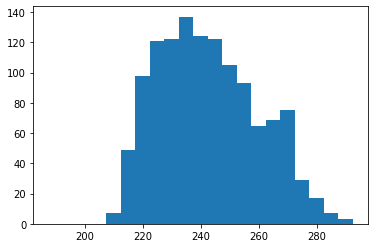

In [339]:
hist, bin_edges= np.histogram(x, bins = np.arange(190,300,5))
import matplotlib.pyplot 

plt.bar(bin_edges[:-1], hist, width = 5)
plt.show()

In [135]:
brightness_temps_DJF.shape

(281,)

In [133]:
np.savetxt('brightness_temps_stormcells_summer.txt', brightness_temps_JJA)
np.savetxt('brightness_temps_stormcells_winter.txt', brightness_temps_DJF)

In [865]:
# loop through files 
brightness_temps = np.array(())

for file in precip_masks: 
    # get data from file 
    data= Dataset(file)
    mask = data['__xarray_dataarray_variable__']
    mask = np.array(mask)
    mask = np.flip(mask, axis = 0 ).T
    year = file[52:56]
    month = file[56:58]
    print('read in file for ', year, month)

    # loop through timesteps 
    for t in np.arange(1,mask.shape[2]):
        idx = mask.shape[2] - t
        timestep = mask[:-50,:,idx]
        elevations_tp= elevation[:-50,:]
        timestep[elevations_tp < 3000] = 0 
        if timestep[timestep> 0].shape[0] != 0:
            # get corresponding TBB 
            tbb_data = Dataset(tbbdir+ year+ '/merg_' + year+month+ '.nc4')
            Tb= tbb_data['Tb']
            # bring NCEP data to same shape as GPM 
            tbb= Tb[t,70:201,100:451]
            tbb[elevations_tp < 3000] = 0
            # collect brightness temperatures 
            values = tbb[timestep > 0].flatten()
            brightness_temps = np.append(brightness_temps,values)
    print(brightness_temps.shape)

read in file for  2014 06
(309809,)
read in file for  2014 07
(886232,)
read in file for  2014 08
(1461527,)
read in file for  2015 06
(1800094,)
read in file for  2015 07
(2163929,)
read in file for  2015 08
(2737619,)


In [866]:
np.savetxt('brightness_temps_precip_cells_summer.txt', brightness_temps)

In [856]:
# read in csv

summer = np.loadtxt('brightness_temps_precip_cells_summer.txt')
winter = np.loadtxt('brightness_temps_precip_cells_winter.txt')

In [868]:
# calculate frequencies 
hist_JJA, bin_edges = np.histogram(summer, bins )
hist_DJF, bin_edges = np.histogram(winter, bins )


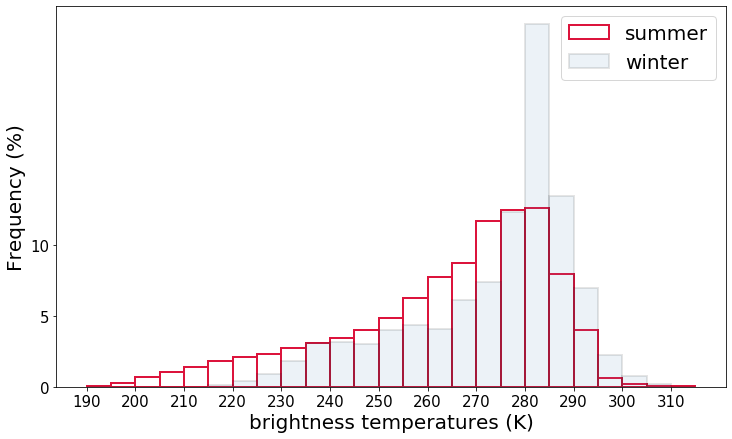

In [869]:
# distribution of all brightness temperature values 

plt.figure(figsize = (12,7))
plt.bar(bins[:-1], hist_JJA/np.nansum(hist_JJA) * 100, width = 5, align= 'edge', edgecolor = 'crimson', color = 'white' , linewidth= 2.0, label= 'summer')
plt.bar(bins[:-1], hist_DJF/np.nansum(hist_DJF) * 100, width = 5, align= 'edge', edgecolor = 'black', color = 'steelblue', alpha= 0.1, linewidth= 2.0, label= 'winter')
plt.xticks(bin_edges[::2], fontsize= 15)
plt.yticks(np.arange(0,15,5), fontsize= 15)
plt.legend(fontsize= 20)

plt.ylabel('Frequency (%)', fontsize = 20)
plt.xlabel('brightness temperatures (K)', fontsize= 20)
plt.savefig('tbb_precip_cells.png')
plt.show()
